In [120]:

import pandas as pd 
import numpy as np
import seaborn as sns
from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from env import username, host, password

import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from prepare import num_distributions, clean_telco_churn, telco_churn_split, prep_telco_churn, get_metrics_binary
from explore import get_obj_stats, get_num_stats, countplot, get_churn_heatmap

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics

from math import sqrt
from scipy import stats

In [2]:
df = get_telco_churn_data()

In [3]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [4]:
## function that cleans the data

df = clean_telco_churn(df)

In [5]:
df.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
0,0030-FNXPP,0,0,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0031-PVLZI,0,1,1,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0098-BOWSO,0,0,0,27,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0107-WESLM,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0114-RSRRW,0,1,0,10,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   int64  
 3   dependents         7043 non-null   int64  
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   int64  
 6   multiple_lines     7043 non-null   int64  
 7   online_security    7043 non-null   int64  
 8   online_backup      7043 non-null   int64  
 9   device_protection  7043 non-null   int64  
 10  tech_support       7043 non-null   int64  
 11  streaming_tv       7043 non-null   int64  
 12  streaming_movies   7043 non-null   int64  
 13  paperless_billing  7043 non-null   int64  
 14  monthly_charges    7043 non-null   float64
 15  total_charges      7043 non-null   float64
 16  churn              7043 

In [7]:
## assigning num and obj variables

num_vars = ['tenure','monthly_charges','total_charges']
obj_vars = list((df.columns).drop(num_vars))
target = 'churn'

In [8]:
def countplot(df):
    '''returns countplots of all columns in dataframe'''
    for i in df.columns:
        sns.countplot(data=df, x=i, hue='churn')
        plt.show()

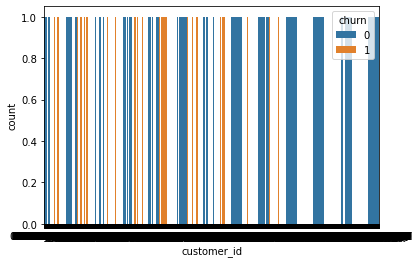

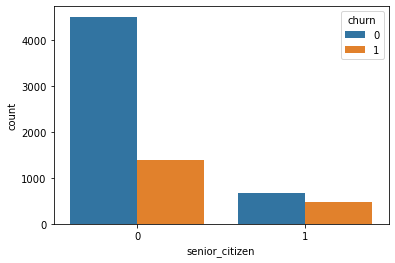

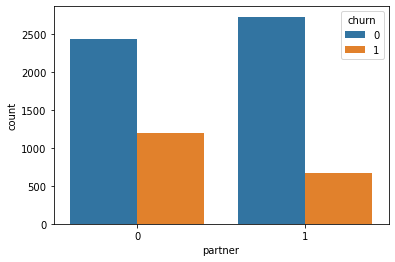

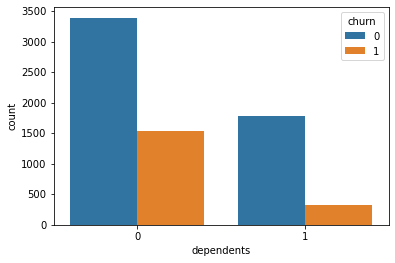

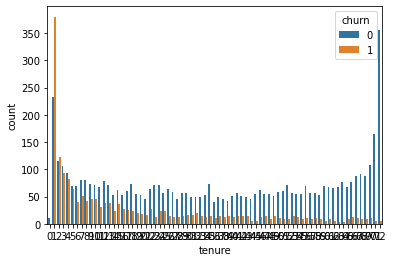

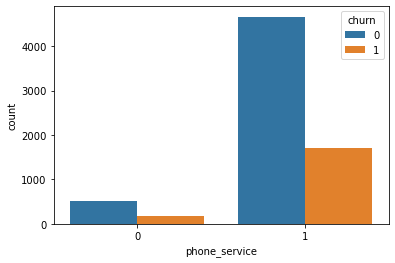

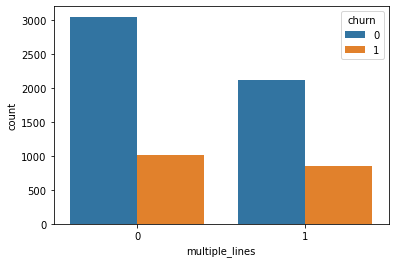

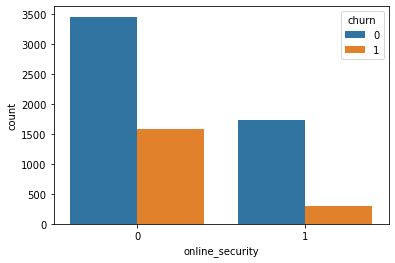

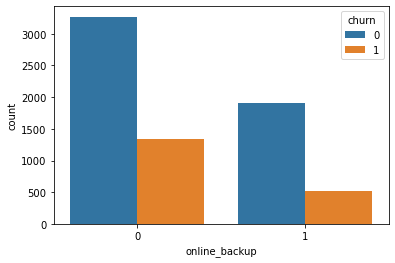

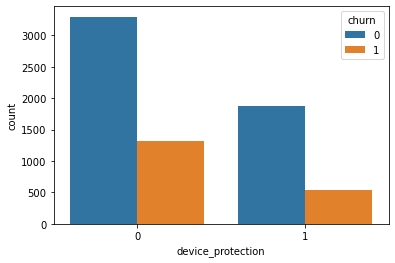

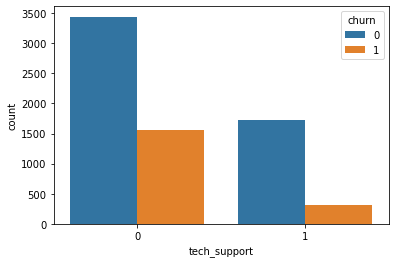

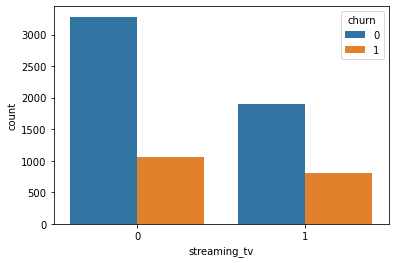

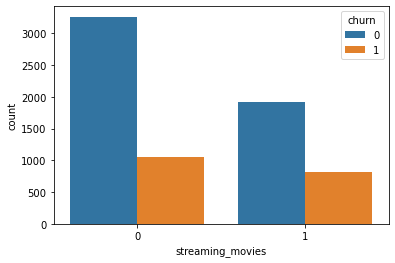

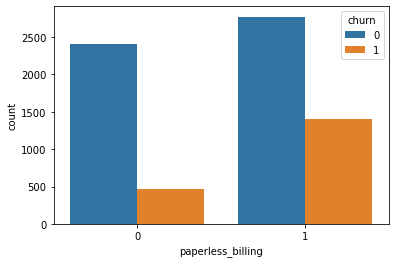

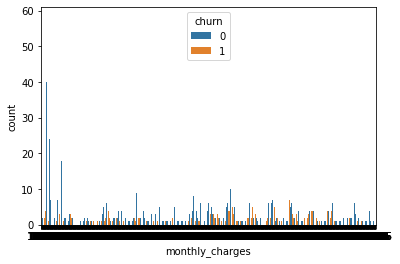

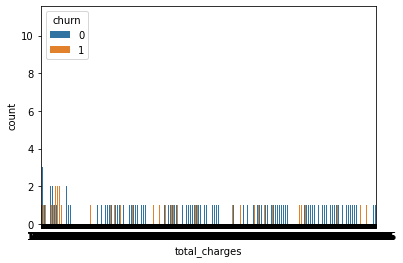

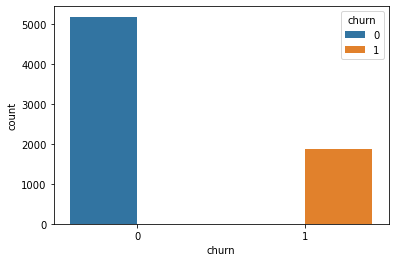

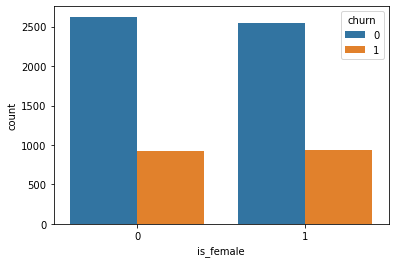

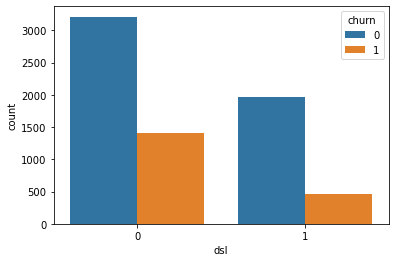

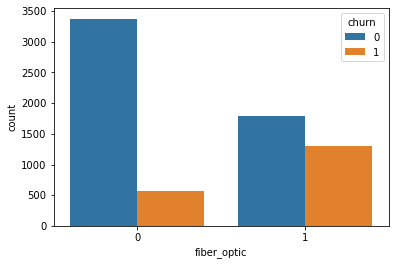

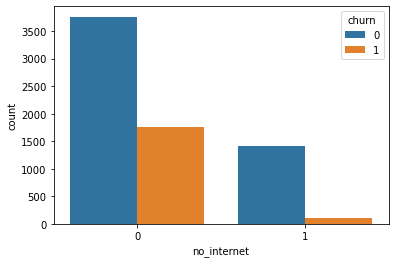

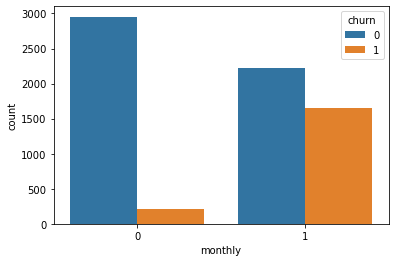

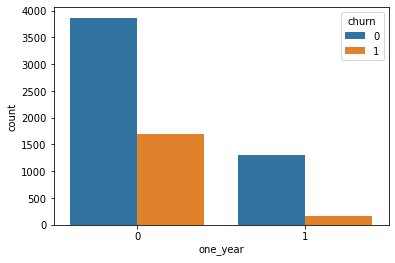

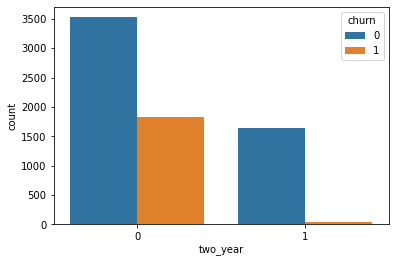

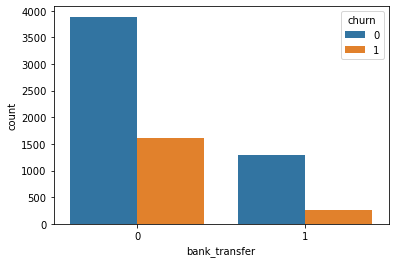

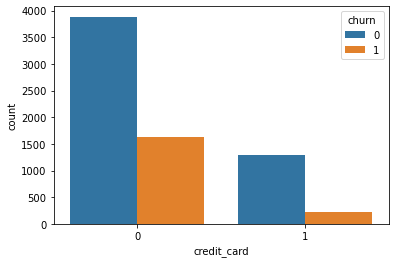

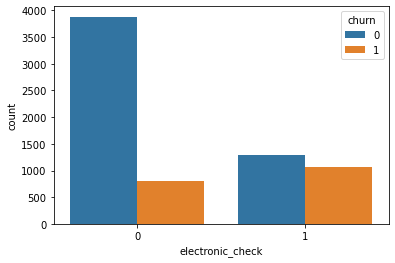

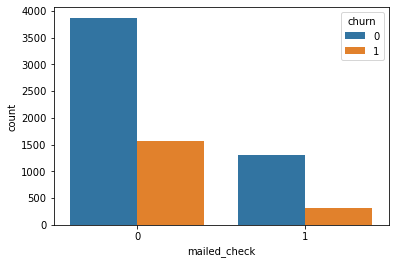

In [9]:
countplot(df)

In [10]:
## Plots of all the objects

def get_obj_stats(df):
    for i in obj_vars:
        sns.countplot(data=df, hue=i , x = target) 
        plt.show()

ValueError: Image size of 386x105714 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

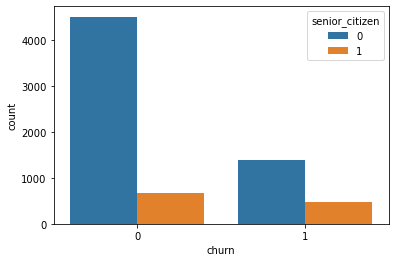

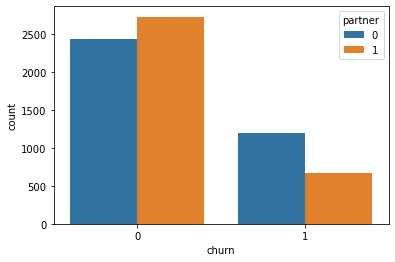

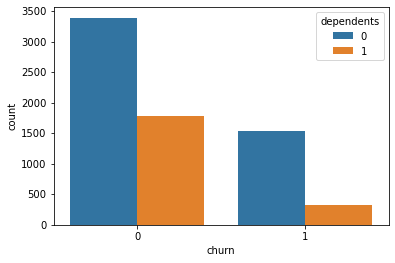

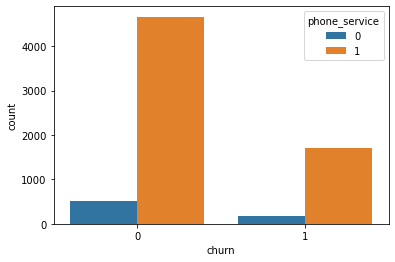

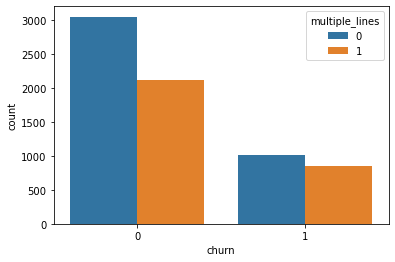

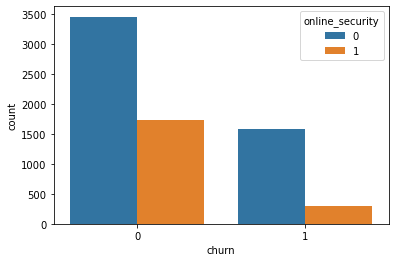

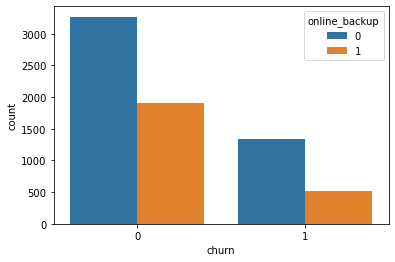

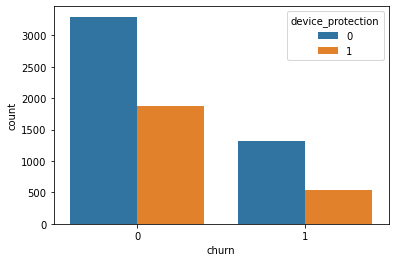

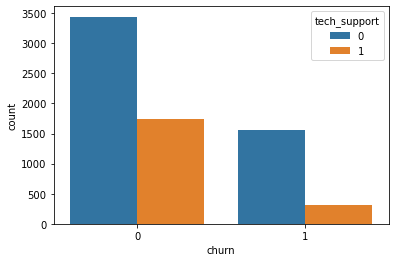

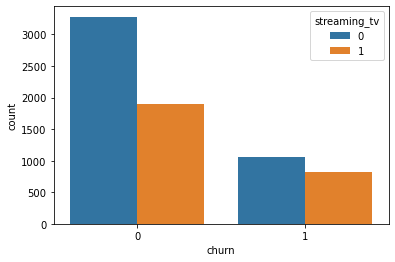

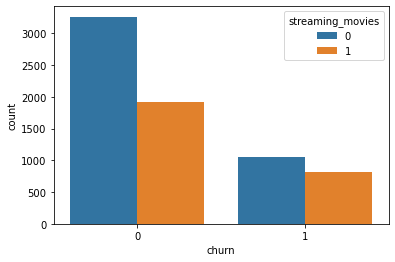

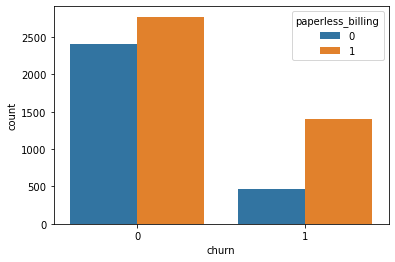

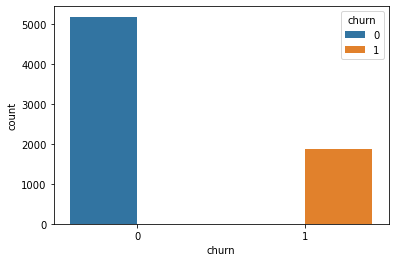

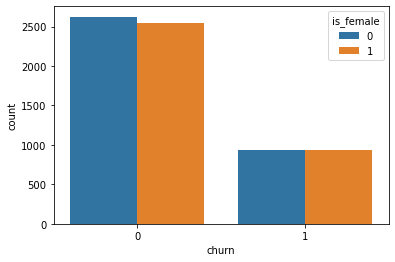

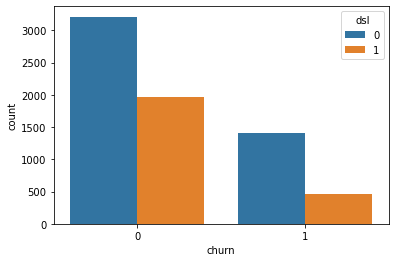

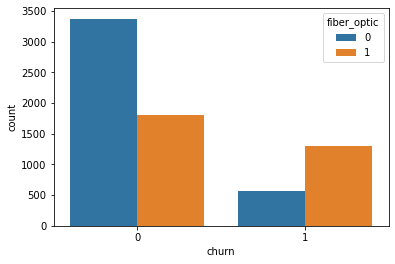

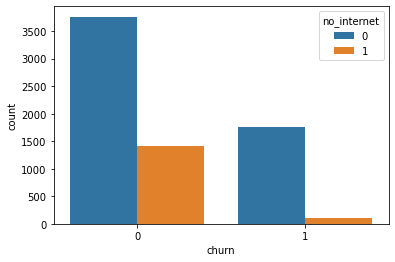

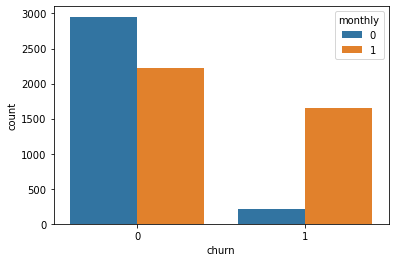

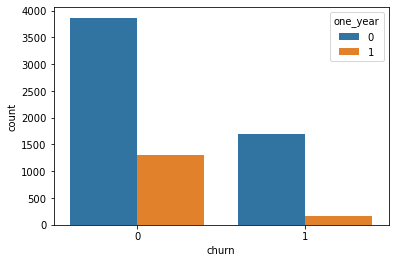

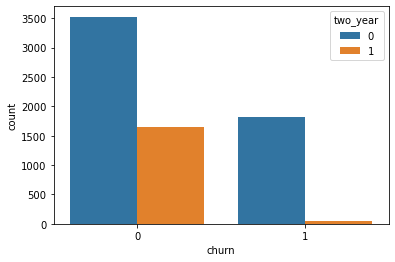

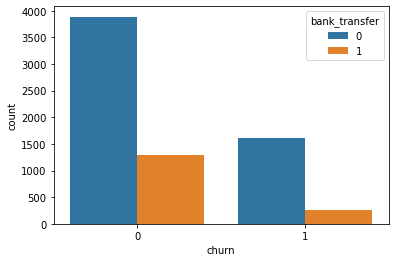

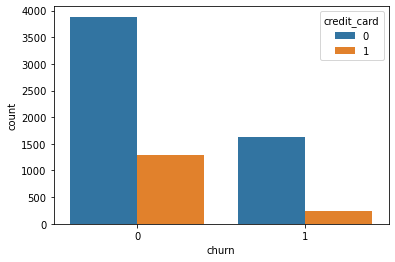

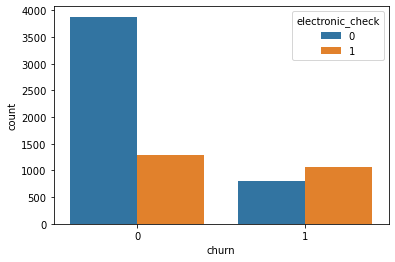

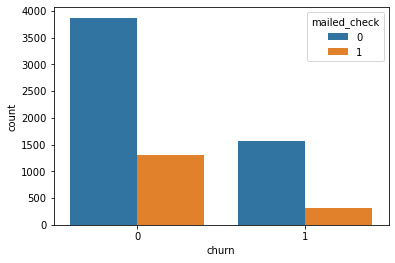

In [11]:
get_obj_stats(df)

Observations from Large Influx of Count Plots¶

-Monthly customers are the largest churning group of the three contract types.

-I am noticing that customers using fiber optic tend to churn more than other internet service types.

-Customers who pay with electronic check churn more than other payment types.

In [12]:
## Snap shot of who churns
df.sample(50)
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [13]:
def get_churn_heatmap(df):
    '''returns a beautiful heatmap with correlations'''
    plt.figure(figsize=(8,12))
    churn_heatmap = sns.heatmap(df.corr()[['churn']].sort_values(by='churn', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='coolwarm')
    churn_heatmap.set_title('Features Correlated with Churn')

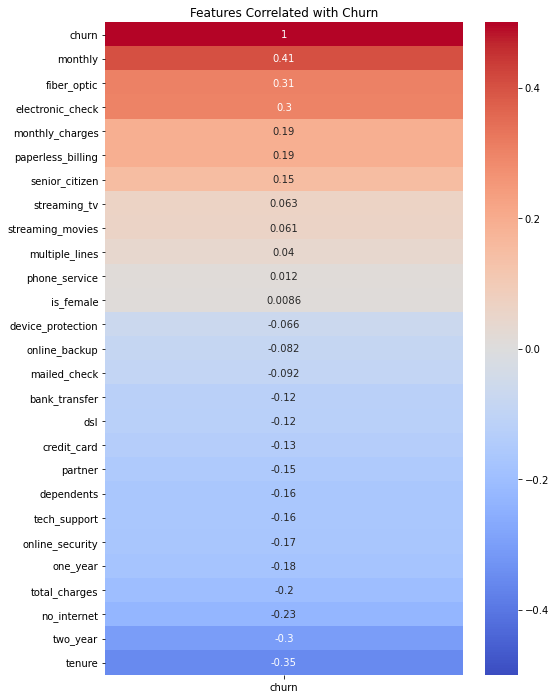

In [14]:
### Heat mean created function to show the highest correlation categories to people who churn 
get_churn_heatmap(df)

In [33]:
### assign variables. For some reason the function did not work

train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn)

In [34]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 28)
validate -> (1691, 28)
test -> (1409, 28)


In [35]:
telco_churn_split(df)

(     customer_id  senior_citizen  partner  dependents  tenure  phone_service  \
 5707  5605-XNWEN               1        1           0      72              1   
 4471  4355-CVPVS               0        1           1      56              1   
 4994  3915-ODIYG               1        0           0      60              1   
 3458  6575-SUVOI               1        1           0      25              1   
 3818  9504-DSHWM               0        0           0      20              1   
 ...          ...             ...      ...         ...     ...            ...   
 4258  0406-BPDVR               1        1           0      54              1   
 328   6040-CGACY               0        0           0      15              1   
 1405  4102-OQUPX               1        1           0       1              1   
 4266  0512-FLFDW               1        1           0      60              1   
 6864  7197-VOJMM               0        1           0      67              1   
 
       multiple_lines  onl

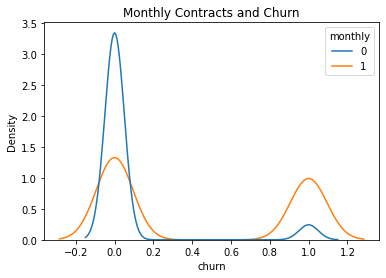

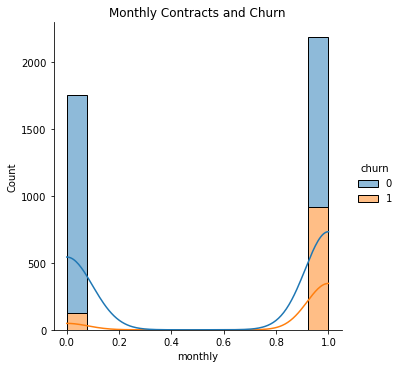

In [98]:
plt.subplots()
sns.kdeplot(data=df, hue='monthly' , x = 'churn') 
plt.title('Monthly Contracts and Churn')
plt.show()


sns.displot(train, x='monthly', hue = 'churn', multiple= 'stack', kde = True)
plt.title('Monthly Contracts and Churn')
plt.show()


- Monthly contracts have the highest correlation to churn

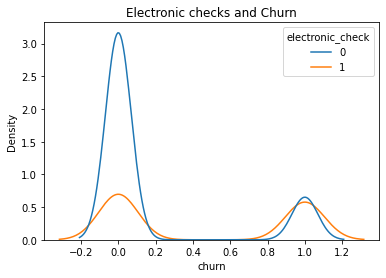

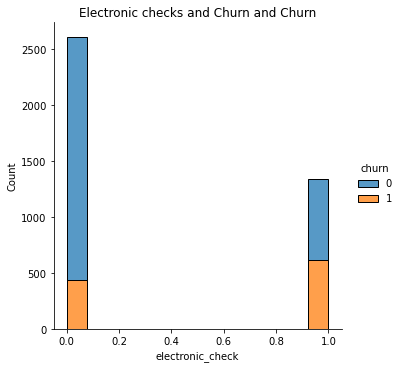

In [99]:
plt.subplots()
sns.kdeplot(data=df, hue='electronic_check' , x = 'churn') 
plt.title('Electronic checks and Churn')
plt.show()


sns.displot(train, x='electronic_check', hue = 'churn', multiple= 'stack')
plt.title('Electronic checks and Churn and Churn')
plt.show()

- electronic check has a high correlation to churn

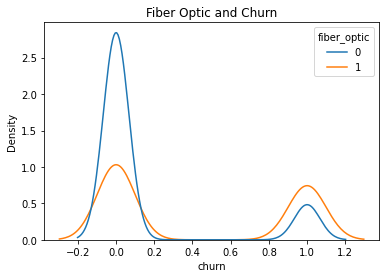

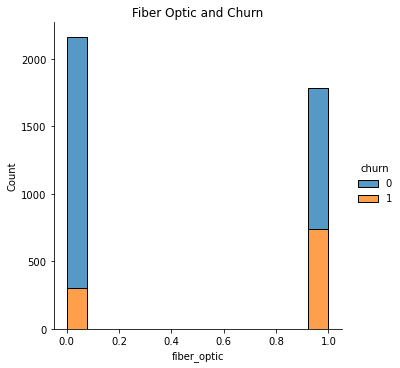

<ipython-input-111-967ecc45224c>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
<ipython-input-111-967ecc45224c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


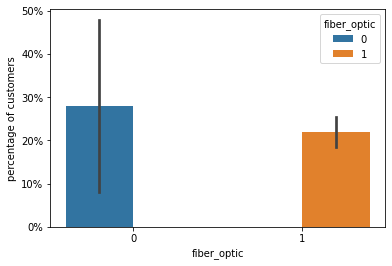

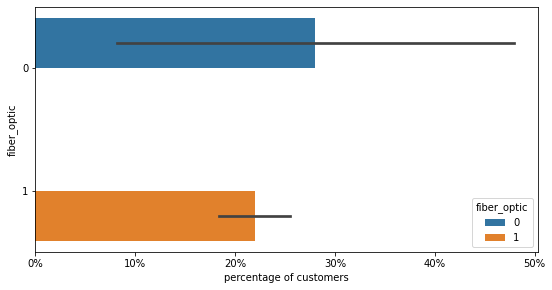

In [111]:
plt.subplots()
sns.kdeplot(data=df, hue='fiber_optic' , x = 'churn') 
plt.title('Fiber Optic and Churn')
plt.show()


sns.displot(train, x='fiber_optic', hue = 'churn', multiple= 'stack')
plt.title('Fiber Optic and Churn')
plt.show()


def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["churn"].value_counts().to_frame()
    g = g.rename({"churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='fiber_optic', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='fiber_optic', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("fiber_optic")

plt.figure(figsize=(9, 4.5))
barplot_percentages("fiber_optic", orient='h')

- fiber optic also has a high correlation to churn

In [37]:
df = get_telco_churn_data()

In [38]:
df = clean_telco_churn(df)

In [39]:
train, validate, test = prep_telco_churn(df)

## Hypothesis 1


-Ho: Length of tenure is indpendent of churn

-Ha: Lenth of tenure is not dependent of churn

In [40]:
null_hypothesis = "Tenure is independent of churn."
alternative_hypothesis = "Tenure is not independent of churn."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.tenure, train.churn, margins = True)
observed

churn,0,1,All
tenure,,,
0,7,0,7
1,135,215,350
2,63,65,128
3,54,53,107
4,52,40,92
...,...,...,...
69,46,2,48
70,62,7,69
71,90,4,94


In [51]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[   7    0    7]
 [ 135  215  350]
 [  63   65  128]
 [  54   53  107]
 [  52   40   92]
 [  40   34   74]
 [  42   23   65]
 [  39   33   72]
 [  44   18   62]
 [  40   24   64]
 [  43   23   66]
 [  33   19   52]
 [  43   19   62]
 [  44   24   68]
 [  30   15   45]
 [  41   26   67]
 [  27   19   46]
 [  32   15   47]
 [  41   12   53]
 [  30    8   38]
 [  26    9   35]
 [  24    8   32]
 [  36   17   53]
 [  43   11   54]
 [  44   13   57]
 [  34   14   48]
 [  35   11   46]
 [  38    3   41]
 [  23    5   28]
 [  30    9   39]
 [  33    8   41]
 [  24    6   30]
 [  28   10   38]
 [  33    8   41]
 [  29    9   38]
 [  44   11   55]
 [  18    7   25]
 [  27    9   36]
 [  24    6   30]
 [  19    7   26]
 [  28    7   35]
 [  28   10   38]
 [  26    9   35]
 [  28    7   35]
 [  28    1   29]
 [  32    5   37]
 [  34    9   43]
 [  34    9   43]
 [  32    3   35]
 [  24   11   35]
 [  33    5   38]
 [  36    5   41]
 [  49    5   54]
 [  31    8   39]
 [  34    7   41]


In [42]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Tenure is independent of churn.
There is evidence to suggest: Tenure is not independent of churn.


## Hypothesis 2

- Ho: People who have fiber optic are independent of churn

- Ha: People who have fiber optic are dependent on churn

In [57]:
null_hypothesis = "fiber optic customers are independent of churn."
alternative_hypothesis = "fiber optic customers are dependent of churn."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.fiber_optic, train.churn, margins = True)
observed

churn,0,1,All
fiber_optic,,,
0,1858,304,2162
1,1039,742,1781
All,2897,1046,3943


In [53]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1858  304 2162]
 [1039  742 1781]
 [2897 1046 3943]]
---
Expected

[[1588  573 2162]
 [1308  472 1781]
 [2897 1046 3943]]
---

chi^2 = 381.6926
p     = 0.0000


In [58]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: fiber optic customers are independent of churn.
There is evidence to suggest: fiber optic customers are dependent of churn.


## Hypothesis 3

- Ho: People who pay with electronic check are inpendent of churn

- Ha: People who pay with electronic check are dependent on churn




In [62]:
null_hypothesis = "People who pay with electronic check are independent of churn."
alternative_hypothesis = "People who pay with electronic check are dependent on churn."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.electronic_check, train.churn, margins = True)
observed

churn,0,1,All
electronic_check,,,
0,2173,434,2607
1,724,612,1336
All,2897,1046,3943


In [60]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[2173  434 2607]
 [ 724  612 1336]
 [2897 1046 3943]]
---
Expected

[[1915  691 2607]
 [ 981  354 1336]
 [2897 1046 3943]]
---

chi^2 = 385.3859
p     = 0.0000


In [63]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: People who pay with electronic check are independent of churn.
There is evidence to suggest: People who pay with electronic check are dependent on churn.
